In [5]:
from __future__ import division
import numpy as np
%pylab inline
import matplotlib.pyplot as plt
# JSAnimation import available at https://github.com/jakevdp/JSAnimation
from JSAnimation import IPython_display
from matplotlib import animation

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


# Metody prvního řádu

S nutností řešit obyčejné diferenciální rovnice se teoretický astrofyzik setkává prakticky každodenně. Jak už to tak v životě bývá, šance na nalezení analytického řešení je velmi mála. Reálné úlohy se svojí komplikovaností značně liší od učebnicových příkladů a mnohdy si nevystačíme ani s aproximací úlohy na co nejjednodušší problém. Nezbývá nic jiného, než přistoupit k redukci úlohy na numerický problém a nalezení jeho řešení s odpovídající přesností a případným omezením vyplývajícím z redukce na numerický problém.

## Eulerova metoda
Předpokládejme, že máme zadanou *Cauchyho počáteční úlohu*, kterou chceme vyřešit na intervalu $(t_o,t_{\rm end})$ s počáteční podmínmkou $y_0$

$$
\frac{{\rm d}y}{{\rm d}x} = f(t,y)\quad t_0 \leq t \leq t_{\rm end} \quad y(t_0) = y_0.
$$

Nejjednodušší způsob řešení spočívá ve vytvoření diskrétní reprezentace nezávislé veličiny $t$ v daném intervalu. V našem případě vytvoříme ekvidistantní síť bodů $t \in \{t_0,t_1,t_2,\dots,t_{\rm end}\}$, pro které platí vztah

$$
t_i = t_0 + ih, \quad \text{kde}\, i = 1,2,3, \dots N,
$$

kde jsme provedli přeznačení $t_{\rm end} = t_{N}$. V dalším kroku s pomocí této diskrétní reprezentace určíme aproximativně derivaci. Použijeme k tomu Taylorův rozvoj

$$
y(t+h) = y(t)+\frac{{\rm d}y(t)}{{\rm d}t}h+\frac{{\rm d}^2 y(t)}{{\rm d}t^2}h^2+\dots.
$$

Zanedbáním členů druhého a vyšších řádů, můžeme derivaci aproximovat výrazem

$$
\frac{{\rm d}y}{{\rm d}t} \approx \frac{y(t+h)-y(t)}{h}
$$

S použitím ekvidistantní diskrétní reprezentace je derivace v daném 
časovém kroku $t_i$  dána vztahem

$$
\frac{{\rm d}y}{{\rm d}t}\Big\vert_{t=t_i} \approx \frac{y(t_i+h)-y(t_i)}{h}.
$$

Vidíme, že celý problém řešení výše uvedené obyčejné diferenciální rovnice lze jednoduše převést na iterativní postup, kdy hodnotu funkce $y(t_{i+1})$ jednoznačně určíme ze znalosti hodnoty funkce v předchozím časovém kroku $t_i$

$$
y_{i+1} = y_{i}+hf(t_i,y_i)+\Delta{\epsilon}_{\rm local}
$$

Chyba, které se v tomto kroku dopouštíme je dána *lokální zaokrouhlovací chybou*. Což je chyba, která vzniká v jednom iteračním kroku v důsledku použité numerické metody a ji určíme z druhé derivace 

$$
y(t+h)-y(t) = \frac{1}{2}h^2 y''(\xi)
$$

*Globální zaokrouhlovací chyba* je kumulativní efekt lokálních zaokrouhlovacích chyb, tedy chyba metody, kterou se liší skutečné řešení od numerického řešení po uplynutí dostatečného počtu iteračních kroků. Její odhad je obtížnější, zájemce lze odkázat na [Euler method error](http://www.math.unl.edu/~gledder1/Math447/EulerError)

Je nutné poznamenat, že funkce $y$ může být vektorovou funkcí a nejen skalární. Postup je však formálně stále stejný.

### Postup algoritmu

* Vytvoříme $N$ prvkovou diskrétní reprezentaci nezávislé veličiny z intervalu $(t_0,t_{\rm end})$
* Převedeme všechny derivace v rovnici vystupující na jejich diskrétní aproximaci a vyjádříme závislou veličinu v iterativním tvary

$$
y_{i+1} \approx f(y_i,t_i)
$$
* Rovnici řešíme iterativně a to v zadaném intervalu $(t_0,t_N= t_{\rm end})$ s využitím počáteční podmínky $y(t_0)=y_0$

#### Příklad: 
Řešte rovnici 
$$
y' = y, \quad y(0) = 1
$$

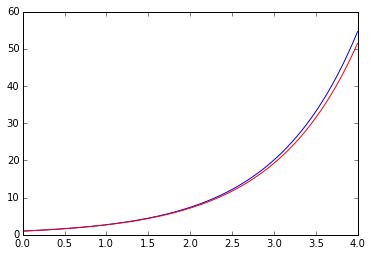

In [6]:
#Euler integrator

def euler(f, y , t, h):
    y[0] = y_0
    # Solution
    for i in range(np.size(y)-1):
        y[i+1] = y[i] +f(y[i],t[i])*h
    return y

y_0 = 1
a = 0.0
b = 4.0
N = 200
t = np.linspace(a,b,N)
h = (b-a)/N
y = np.zeros(np.size(t))

def funkce(y,t):
    return y

y_expect = np.exp(t)
y_solved = euler(funkce,y,t,h)

plt.plot(t,y_expect,'-')
plt.plot(t,y_solved,'r-')

[Runge-Kutta method](http://bender.astro.sunysb.edu/classes/phy688_spring2013/lectures/ODEs.pdf)

### Testovací problém - Keplerův problém

Uvažme těleso zanedbatelné hmotnosti obíhající kolem Slunce o hmotnosti $M$. Trajektorii tělesa dostaneme řešením newtonových pohybových rovnic, přičemž zanedbáme hmotnost obíhajícího tělesa.

\begin{align}
\vec{\dot{x}} & = \vec{v} \\
\vec{\dot{v}} & = -\frac{GM}{r^3}\vec{r}
\end{align}

s pomocí *Keplerova zákona* dostaneme vztah mezi velikostí hlavní poloosy $a$ a periodou $P$. Jako vztažné jednotky zvolíme $[1\,M_{\odot}]$,$[1\,{\text{AU}}]$ a $[1\,\text{rok}]$, čehož plyne

$$
4\pi^2 a^3 = GMP^2
$$

Jako vztažné jednotky zvolíme $[1\,M_{\odot}]$,$[1\,{\text{AU}}]$ a $[1\,\text{rok}]$, důvod je jednoduchý, pro tělesa zanedbatelné hmotnosti platí,
$$
\frac{P^2}{a^3} \approx \frac{4\pi^2}{GM} = \text{const}
$$

tedy tento poměr je pro všechny planety zhruba stejný. Tedy pokud jako referenční planetu zvolíme Zemi, musí platit
$$
4\pi^2 = GM
$$

Jako počáteční podmínky zvolíme pro polohu

\begin{align}
x & = 0 \\
y & = a(1-e)
\end{align}

a pro rychlosti

$$
u = -\sqrt{\frac{GM}{a}\frac{1+e}{1-e}} \\
v = 0
$$

Budeme tedy řešit soustavu differenciálních rovnic, 

\begin{align}
\dot{x} & = u \\
\dot{y} & = v \\
\dot{u} & = -\frac{GM}{r^3}x \\
\dot{v} & = -\frac{GM}{r^3}y
\end{align}

které budeme integrovat pro zadané parametry $a = 1,e = 1$

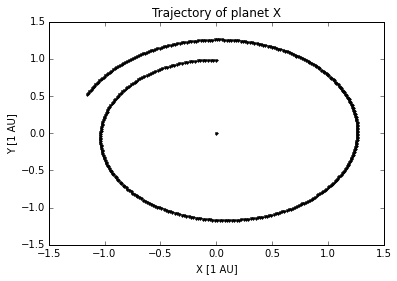

In [7]:
# Modified (set of four first order differential equation) non-optimalized Euler 

# Set of initial declaration and parameters of the problem
a = 1.0
e = 0.01
GM = 4.0*np.pi**2

N = 400
t0 = 0.0
tend = 1.5
t = np.linspace(t0,tend,N)
h = (tend-t0)/N
x = np.zeros((np.size(t),4))


# Function calculate right sides of the ODEs
def f(x_local):
    radius = np.sqrt(x_local[0]**2+x_local[1]**2)
    tau = -GM/radius**3
    return np.array([h*x_local[2],h*x_local[3],h*tau*x_local[0],h*tau*x_local[1]])

# Euler integration method
def euler_vec(f, x , t, h):
    x[0,0] = 0.0
    x[0,1] = a*(1-e)
    x[0,2]= -np.sqrt(GM/a*(1+e)/(1-e))
    x[0,3] = 0.0
    
    x_buf = np.zeros(4)
    
    # Solution
    for i in range(N-2):
        x_buf[:] = x[i,:]
        x[i+1,:] = x_buf[:] + f(x_buf[:])
    return x

solution = euler_vec(f,x,t,h)

plt.title('Trajectory of planet X')
plt.xlabel('X [1 AU]')
plt.ylabel('Y [1 AU]')
plt.plot(solution[:,0],solution[:,1],'k.')

Z tohoto numerického příklady je patrné, že tato metoda není příliš stabilní, namísto kružnice nám trajektorie diverguje ve formě spirály. Z toho také plyne, že energie systému v tomto případě není zachována. Můžete si vyzkoušet sami, jak by dopadla situace pro delší časové okamžiky.

### Aktivity

* Vyzkoušejte si jaký vliv na přesnost řešení bude mít změna časového kroku $h$, tedy počtu bodů $N$. Vykreslete trajektorie planety pro různé hodnoty časového kroku do jednoho grafu. Algoritmus upravte tak, aby počet bodů byl stejný.
* Algoritmus prezentovaný výše není dobře vektorizován, pokuste se jej zefektivnit a porovnejte časy výpočtu

## Eulerova-Cronmerova metoda

Jednoduchá modifikace metody, kterou lze aplikovat na systém obyčejných differenciálních rovnic ve tvaru

\begin{align}
\frac{{\rm d}x}{{\rm d}t} & = f(v,t) \\
\frac{{\rm d}v}{{\rm d}t} & = f(x,t)
\begin{align}

kde $x$ a $v$ mohou být jak vektorové, tak skalární veličiny. Tento tvar koresponduje s vyjádřením pohybových rovnic v *Hamiltonovské mechanice* pokud má *Hamiltonián* tvar

$$
H = T(t,v)+V(t,x)
$$

Iterační předpis s porovnání s klasickou *Eulerovou metodou* modifikujeme

\begin{align}
v_{n+1} & = v_{n} + g(t_n,x_{n})\Delta{t} \\
x_{n+1} & = x_{n} + f(t_n,v_{n+1})\Delta{t}
\end{align}

kde jsme při výpočtu pravé strany $f(x,t)$ použili hodnoty $x_{n+1}$, namísto hodnoty $x_{n}$ z předchozího kroku. Tomuto přístupu se říká implicitní přístup a tvoří celou třídu metod řešení jak obyčejných, tak parciálních diferenciálních rovnic. Podívejme se, co to provede s numerickým řešením našeho problému


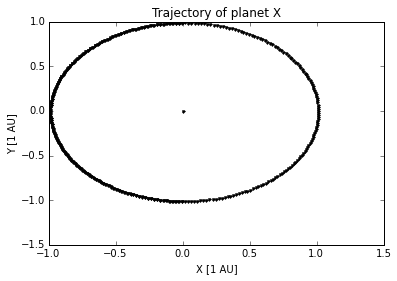

In [8]:
#  Non-optimalized Euler-Cronmer for Kepler problem

# Set of initial declaration and parameters of the problem
a = 1.0
e = 0.01
GM = 4.0*np.pi**2

N = 400
t0 = 0.0
tend = 1.5
t = np.linspace(t0,tend,N)
h = (tend-t0)/N
x = np.zeros((N,2))
v = np.zeros((N,2))


# Function g(x,t) 
def f(v_local):
    return np.array([h*v_local[0],h*v_local[1]])

# Function f(v,t) 
def g(x_local):
    radius = np.sqrt(x_local[0]**2+x_local[1]**2)
    tau = -GM/radius**3
    return np.array([h*tau*x_local[0],h*tau*x_local[1]])

# Euler integration method
def euler_vec(f, g, x, v, t, h):
    x[0,0] = 0.0
    x[0,1] = a*(1-e)
    v[0,0]= -np.sqrt(GM/a*(1+e)/(1-e))
    v[0,1] = 0.0
    
    x_buf = np.zeros(2)
    v_buf = np.zeros(2)
    
    # Solution
    for i in range(N-2):
        x_buf[:] = x[i,:]
        v_buf[:] = v[i,:]
        v[i+1,:] = v_buf[:] + g(x_buf[:])
        v_buf[:] = v[i+1,:]
        x[i+1,:] = x_buf[:] + f(v_buf[:])
    return x,v

solution_x,solution_v = euler_vec(f,g,x,v,t,h)

plt.title('Trajectory of planet X')
plt.xlabel('X [1 AU]')
plt.ylabel('Y [1 AU]')
plt.plot(solution_x[:,0],solution_x[:,1],'k.')

Jak je patrné, tato drobná úprava vedla ke stabilizaci numerického řešení, a to navíc aniž bychom byli nuceni měnit velikost časového kroku. Je také nutné zmínit, že se stále jedná o **metodu I. řádu**. Takto upravené numerické schéma zachovává energii v systému, patří tedy do třídy takzv. *symplektických* integrátorů (viz. [Euler-Cromer](https://en.wikipedia.org/wiki/Semi-implicit_Euler_method)). Pro zajímavost, tato vlastnost, tedy stabilizace numerického schématu (metody řešení) použitím *implicitních* hodnot poznáme detailnějí při studiu řešení parciálních diferenciálních rovnic.

### Aktivity
* Modifikujte Eulerovo-Cromerovo schéma tak, aby byla jako implicitní hodnota použita nikoliv rychlost, ale poloha. Otestujte stabilitu této metody
* Modifikujte zadání *Keplerovy úlohy*, tak aby výsledný pohyb tělesa byl eliptický

# Metody vyšších řádů

Vyjdeme opět z *Cauchyho úlohy*

$$
\frac{{\rm d}y}{{\rm d}x} = f(t,y)\quad t_0 \leq t \leq t_{\rm end} \quad y(t_0) = y_0
$$

Abychom určili řešení v čase následujícím kroku $y(t+h)$, předpokládejme řešení ve tvaru 

$$
y(t+h) = y(t)+c_0f(t,y)h+c_1f[t+ph,y+qhf(y,t)]h
$$

Naším úkolem tedy bude určit vztahy mezi koeficienty $c_0,c_1,p,q$. K tomu nám postačí nejprve vyjádřit $y(t+h)$ s pomocí Taylorova rozvoje okolo bodu $t$

$$
y(t+h) = y(t) + f(y,t)h + \frac{1}{2}\left(\frac{\partial f}{\partial t}+\frac{\partial f}{\partial y}\right)h^2+\mathcal{O}(h^3).
$$

Následně určíme $f[t+ph,y+qhf(y,t)]$ s pomocí Taylorova rozvoje okolo bodu $(t,y)$

$$
f[t+ph,y+qhf(y,t)]=f(t,y)+\frac{\partial{f}}{\partial t}ph+\frac{\partial f}{\partial y}qh+\mathcal{O}(h^2),
$$

který dosadíme do předpokládaného řešení. Obdržíme

$$
y(t+h) = y(t)+(c_0+c_1)f(t,y)h+c_1\left(\frac{\partial f}{\partial t}p+\frac{\partial f}{\partial y}q\right)h^2+\mathcal{O}h^3
$$

Srovnáním takto upraveného předpokládaného řešení s tvarem funkce $y(t+h)$ určené z výše zmíněného Taylorova rozvoje  dostaneme hledané vztahy

\begin{align}
c_0+c_1 & = 1 \\
c_1 p &  = \frac{1}{2} \\
c_1 q & = \frac{1}{2}
\end{align}

Z těchto podmínek je patrné, že máme určitou volnost při volbě parametrů. Jejich volba pak určuje použitou metodu. Rozlišujeme tyto metody

* *Modifikovaná Eulerova metoda* : $c_0 = 0,\, c_1 = 1,\, p = \frac{1}{2},\, q = \frac{1}{2}$
* *Heunova metoda* : $c_0 = \frac{1}{2},\, c_1 = \frac{1}{2},\, p = 1,\, q = 1$
* *Ralstonova metoda* : $c_0 = \frac{1}{3},\, c_1 =\frac{2}{3},\, p = \frac{3}{4},\,q = \frac{3}{4}$

Všechny tyto metody řadíme do třídy metod *Runge-Kutta* druhého řádu. Odvození metod třetího, čtvrtého a vyšších řádů je analogické, je nutné zahrnout více členů. Samotné odvození je zdlouhavé a nám postačí pro ilustraci výše uvedené metody.

### Aktivity
* Naprogramujte všechny výše uvedené varinaty *Rungeovy-Kutovy* metody druhého řádu, aplikujte na Keplerův problém a srovnejte řešení se symplektickým integrátorem

## Problém: Mapování fázového prostoru matematického kyvadla

Diferenciální rovnici popisující matematické kyvadlo znají asi všichni, provází studenta studiem od prvních počátků na škole
\begin{align}
\frac{\rm d \theta}{{\rm d}t} & = \omega \\
\frac{\rm \omega}{{\rm d} t} & = -\frac{g}{l}\sin(\theta)
\end{align}

Naším úkolem bude zmapovat fázový prostor generovaný takovýmto dynamickým systémem.

### Algoritmus:
* Vygenerujeme sadu náhodných počátečních podmínek $(\theta,\omega)$
* Pro každou sadu těchto podmínek vyřešíme soustavu dvou diferenciálních rovnic, popisujících matematické kyvadlo 
* Všechna řešení vykreslíme do jednoho grafu

In [9]:

#RK2 integrator - Heunova metoda
def RK2_step( f, y, t, h ):
    #Creating solutions
    K0 = h*f(t, y)
    K1 = h*f(t + 0.5*h, y + 0.5*K0)
    y1 = y + K1
    #Returning solution
    return y1


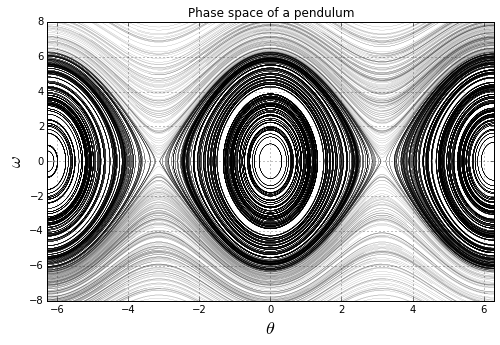

In [10]:
#========================================================
#Defining parameters
#========================================================
#Gravity
g = 9.8
#Pendulum's lenght
l = 1.0

#Number of initial conditions
Nic = 1000
#Maxim angular velocity
omega_max = 8

#Maxim time of integration
tmax = 6*np.pi
#Timestep
h = 0.01

#========================================================
#Dynamical function of the system
#========================================================
def function( t, y ):
    #Using the convention y = [theta, omega]
    theta = y[0]
    omega = y[1]
    #Derivatives
    dtheta = omega
    domega = -g/l*np.sin(theta)
    return np.array([dtheta, domega])

#========================================================
#Generating set of initial conditions
#========================================================
theta0s = -4*np.pi + np.random.random(Nic)*8*np.pi
omega0s = -omega_max + np.random.random(Nic)*2*omega_max


#========================================================
#Integrating and plotting the solution for each IC
#========================================================
#Setting figure
plt.figure( figsize = (8,5) )
for theta0, omega0 in zip(theta0s, omega0s):
    #Arrays for solutions
    time = [0,]
    theta = [theta0,]
    omega = [omega0,]
    for i, t in zip(xrange(int(tmax/h)), np.arange( 0, tmax, h )):
        #Building current condition
        y = [theta[i], omega[i]]
        #Integrating the system
        thetai, omegai = RK2_step( function, y, t, h )
        #Appending new components
        theta.append( thetai )
        omega.append( omegai )
        time.append( t )
    #Plotting solution
    plt.plot( theta, omega, lw = 0.1, color = "black" )
    
#Format of figure
plt.xlabel( "$\\theta$", fontsize = 18 )
plt.ylabel( "$\omega$", fontsize = 18 )
plt.xlim( (-2*np.pi, 2*np.pi) )
plt.ylim( (-omega_max, omega_max) )
plt.title( "Phase space of a pendulum" )
plt.grid(1)



### Rungeova-Kuttova metoda 4. řádu

V praxi nejpoužívanější metodou pro řešení soustavy ODE, plně postačující i pro řešení dynamických systémů vykazujících chaos je *Rungeova-Kuttova metoda 4. řádu*. Jak jsme již naznačili výše, její odvození je podobné jako u metody druhého řádu, je však zapotřebí započíst členy vyšších řádů. Odvození je zdlouhavé, lze ho nalézt na [Rungeova-Kuttova metoda 4.řádu](https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta_methods#Derivation_of_the_Runge.E2.80.93Kutta_fourth-order_method)

Řešení $y(t+h)$ v následujícím časovém kroku předpokládáme ve tvaru

$$
y(t+h) = y(t)+\frac{1}{6}\left(K_0+2K_1+2K_2+K_3\right)
$$

kde 

\begin{align}
K_0 = hf(t,y) \\
K_1 = hf\left(t+\frac{h}{2},y+\frac{K_0}{2}\right) \\
K_2 = hf\left(t+\frac{h}{2},y+\frac{K_1}{2}\right) \\
K_3 = hf\left(t+\frac{h}{2},y+K_2\right)
\end{align}

### Aktivity

* Použijte *Rungeovu-Kuttovu* metodu 4. řádu na řešení soustavy 

\begin{align}
\frac{{\rm d} x}{{\rm d}t} & =a(y-x) \\
\frac{{\rm d} y}{{\rm d}t} & =x(b-z)-y \\
\frac{{\rm d} z}{{\rm d}t} & =xy-cz
\end{align}

* Vykreslete stavový portrét pro hodnoty parametru $a=10,\, b=28,\, c=8/3$. Počáteční podmínky zvolte náhodně. Tento systém poprvé prezentoval Edward Lorenz, jako zjednodušený model počasí, který přes svoji jednoduchost vykazuje komplexní složitost resp. chaotické chování (viz. [Lorenzův systém](https://en.wikipedia.org/wiki/Lorenz_system)). Stavový portrét tvoří [podivný atraktor](https://en.wikipedia.org/wiki/Attractor)

* S použitím animace trajektorie ve stavovém portrétu ukažte, že *Lorenzův chaotický atraktor* ma vlastnost přitažlivosti, tedy že přes různé startovací počáteční podmínky je řešení přitahováno na oblast atraktoru.